In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [18]:
df["test_score(out of 10)"].fillna(df["test_score(out of 10)"].mode()[0],inplace = True)

In [36]:
df["experience"].fillna(df["experience"].mode()[0],inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,eleven,8.0,9,50000
1,eleven,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,7.0,7,72000
7,eleven,7.0,8,80000


In [38]:
df["experience"] = df["experience"].apply(lambda x : w2n.word_to_num(x))

In [39]:
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,11,8.0,9,50000
1,11,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [40]:
corelation_matrix = df.corr()

In [42]:
corelation_matrix["salary($)"].sort_values(ascending=False)

salary($)                     1.000000
interview_score(out of 10)    0.037820
test_score(out of 10)        -0.077524
experience                   -0.095300
Name: salary($), dtype: float64

In [43]:
import seaborn as sns

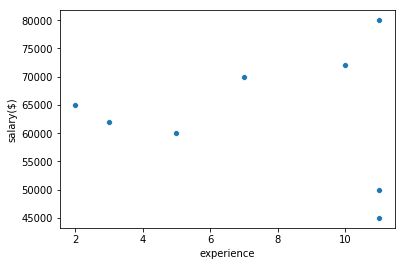

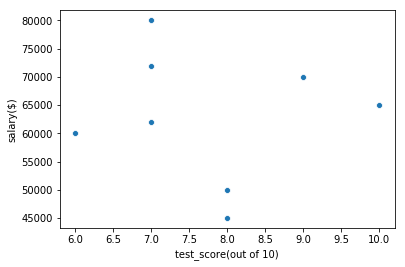

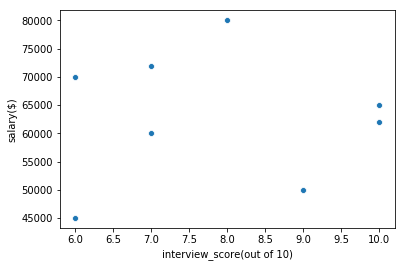

In [45]:
for col in df.columns:
    if col != "salary($)":
        sns.scatterplot(x=col,y="salary($)" ,data = df)
        plt.show()
        

In [49]:
x_data = df.drop(["salary($)"],axis=1)


In [50]:
y_data = df["salary($)"]

In [51]:
x_data

,experience,test_score(out of 10),interview_score(out of 10)
0,11,8.0,9
1,11,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6
5,3,7.0,10
6,10,7.0,7
7,11,7.0,8


In [52]:
y_data

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [53]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_data,y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
model.predict([[11,8,9]])

array([61396.77735767])

In [65]:
model.predict(x_data)

array([61396.77735767, 61532.74201256, 65635.45744922, 62841.95303527,
       62090.03948659, 65304.98570602, 62809.63439274, 62388.41055994])

In [69]:
print(list(y_data))
# y_data = y_data.reshape(-1, 1)
# pd.DataFrame(data = y_data)

[50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000]


In [70]:
model.predict([[2,9,6]])

array([63969.55089243])

In [71]:
model.predict([[12,10,10]])

array([59082.93022359])